In [1]:
import matplotlib.pyplot as plt
import torch
import os
import sys
sys.path.insert(0,'../code/data_utils/SampleClass/')
from Coordinates import Coordinates
plt.style.use('/home/gridsan/gschuette/universal/matplotlib/plot_style_2.txt')

Load the RMSD values

In [9]:
d = './support/rmsd_data/'
force_recompute = False

#filepaths = {
#    d+'tan_on_tan_chrom_22.pt':lambda array_id: d+f'tan_on_tan_chrom_22_{array_id}.pt',
#    d+'tan_on_gen_chrom_22.pt':lambda array_id: d+f'tan_on_gen_chrom_22_{array_id}.pt',
#    d+'gen_on_tan_chrom_22.pt':lambda array_id: d+f'gen_on_tan_chrom_22_{array_id}.pt',
#    d+'gen_on_gen_chrom_22.pt':lambda array_id: d+f'gen_on_gen_chrom_22_{array_id}.pt'
#}

filepaths = {
    d+'tan_on_tan_chrom_22_no_replicates.pt':lambda array_id: d+f'tan_on_tan_chrom_22_{array_id}_no_replicates.pt',
    d+'tan_on_gen_chrom_22_no_replicates.pt':lambda array_id: d+f'tan_on_gen_chrom_22_{array_id}_no_replicates.pt',
    d+'gen_on_tan_chrom_22_no_replicates.pt':lambda array_id: d+f'gen_on_tan_chrom_22_{array_id}_no_replicates.pt',
    d+'gen_on_gen_chrom_22_no_replicates.pt':lambda array_id: d+f'gen_on_gen_chrom_22_{array_id}_no_replicates.pt',
    
    d+'homo_on_tan_chrom_22_no_replicates.pt':lambda array_id: d+f'homo_on_tan_chrom_22_{array_id}_no_replicates.pt',
    d+'homo_on_gen_chrom_22_no_replicates.pt':lambda array_id: d+f'homo_on_gen_chrom_22_{array_id}_no_replicates.pt',
    d+'homo_on_homo_chrom_22_no_replicates.pt':lambda array_id: d+f'homo_on_homo_chrom_22_{array_id}_no_replicates.pt',
    d+'gen_on_homo_chrom_22_no_replicates.pt':lambda array_id: d+f'gen_on_homo_chrom_22_{array_id}_no_replicates.pt',
    d+'tan_on_homo_chrom_22_no_replicates.pt':lambda array_id: d+f'tan_on_homo_chrom_22_{array_id}_no_replicates.pt'
}

data = {}
for fp,fpf in filepaths.items():
    if os.path.exists(fp) and not force_recompute:
        temp = torch.load(fp)
    else:
        temp = []
        for array_id in range(96):
            temp.append(
                torch.stack(
                    torch.load(fpf(array_id)),
                    dim=0
                )
            )
        temp = torch.cat(temp,dim=0)
        torch.save(temp,fp)
    temp*= 100 # Convert to nm
    data[ '_'.join(fp.split('/')[-1].split('_')[:3]) ] = temp.float()



In [12]:
bins = torch.arange(0,1001,5).float()
'''
fig, axes = plt.subplots(nrows=3,ncols=3,layout='constrained',figsize=(8,8))

x = (bins[1:] + bins[:-1])/2
xlim = [bins[0],bins[-1]]
'''
binned_data = {}
for i,label in enumerate(['tan','gen','homo']):
    for j,label_r in enumerate(['tan','gen','homo']):
        l = f'{label}_on_{label_r}'
        hist = torch.histogram(data[l],bins,density=True).hist
        min_hist = torch.histogram(data[l].min(0).values,bins,density=True).hist
        
        binned_data[l] = (hist,min_hist)
        '''
        ax = axes[i][j]

        ax.plot(x,hist,alpha=.5,label=l)
        ax.plot(x,min_hist,alpha=.5,label=l+' (minimum)')

        ax.legend()
        
        ax.set_xlim(xlim)
        maxx = max(hist.max(),min_hist.max())
        ylim = [-.05*maxx,1.05*maxx]
        ax.set_ylim(ylim)
        ax.set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
        '''
        

tan_on_tan tensor([357.5000]) tensor([242.5000])
tan_on_gen tensor([367.5000]) tensor([217.5000])
tan_on_homo tensor([337.5000]) tensor([207.5000])
gen_on_tan tensor([367.5000]) tensor([252.5000])
gen_on_gen tensor([372.5000]) tensor([212.5000])
gen_on_homo tensor([347.5000]) tensor([207.5000])
homo_on_tan tensor([337.5000]) tensor([227.5000])
homo_on_gen tensor([347.5000]) tensor([197.5000])
homo_on_homo tensor([312.5000]) tensor([167.5000])


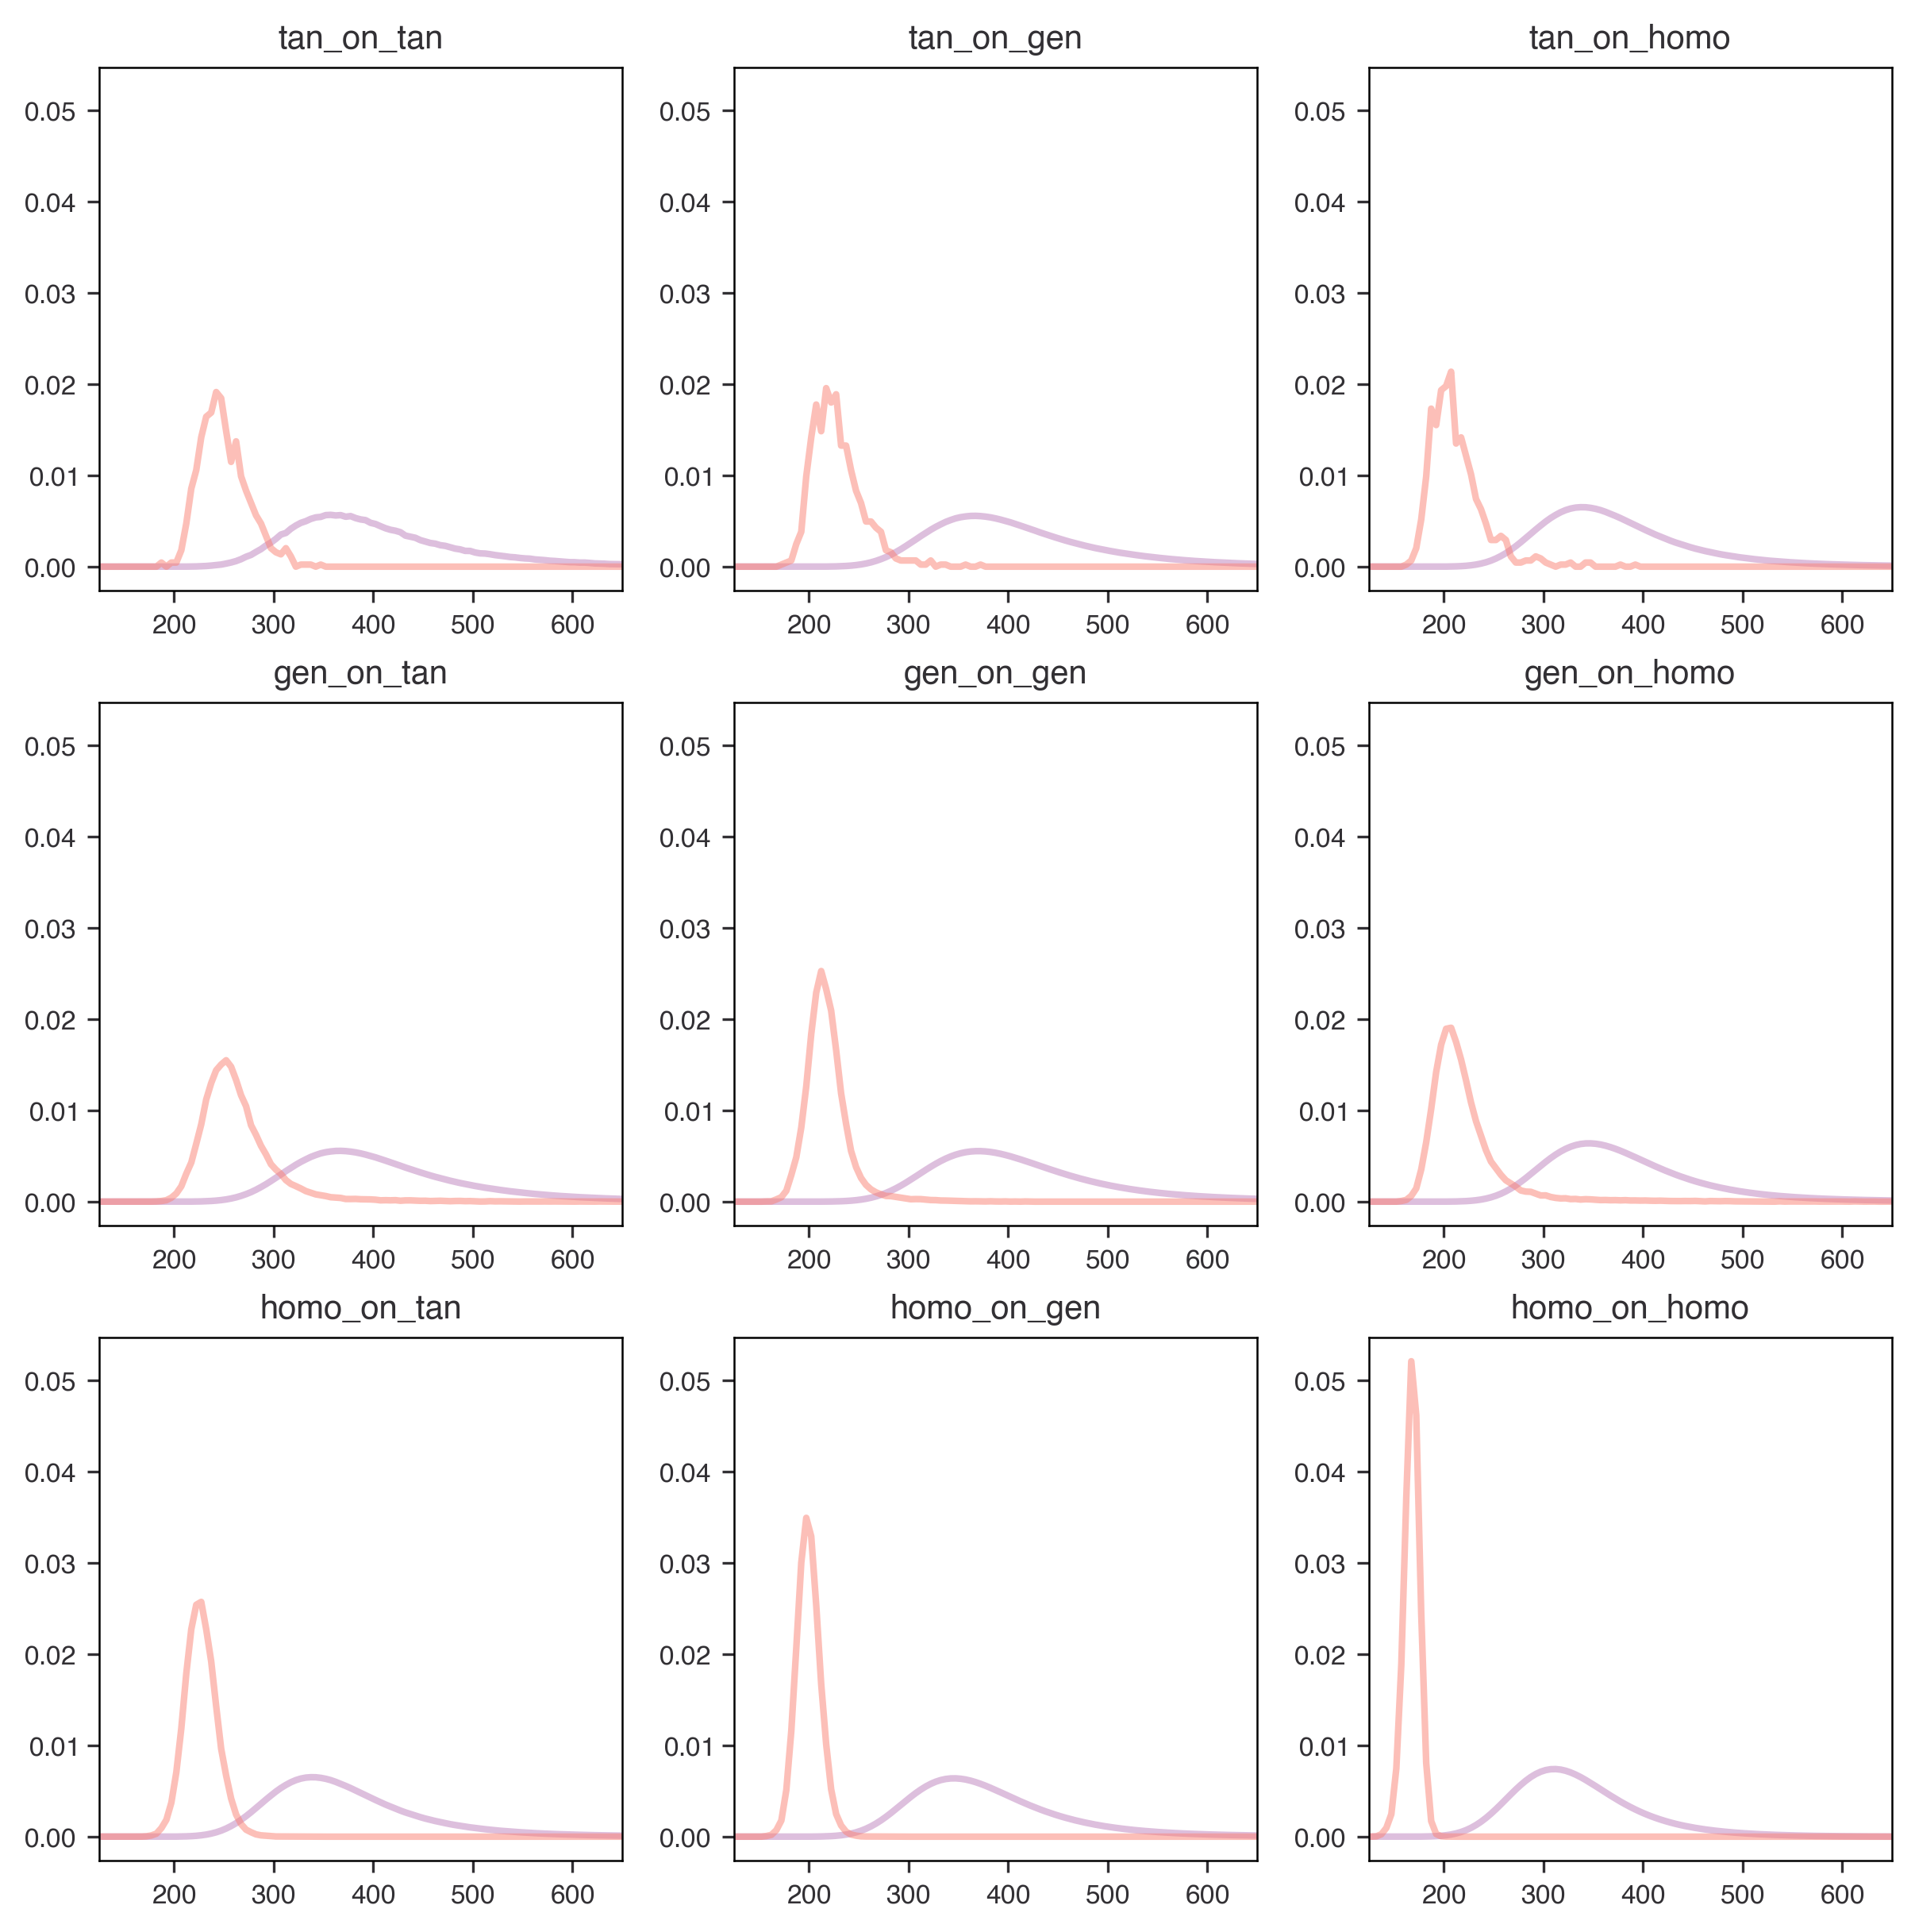

In [21]:
fig, axes = plt.subplots(nrows=3,ncols=3,layout='constrained',figsize=(8,8))
x = (bins[1:] + bins[:-1])/2
#xlim = [bins[0],bins[-1]]
xlim = [125,650]
ymaxx = max([
    max(binned_data[l][0].max(),binned_data[l][1].max()) for l in binned_data
])
ylim = [-.05 * ymaxx, 1.05 * ymaxx]
aspect = (xlim[1]-xlim[0])/(ylim[1]-ylim[0])

for i,label in enumerate(['tan','gen','homo']):
    for j,label_r in enumerate(['tan','gen','homo']):
        l = f'{label}_on_{label_r}'

        hist,min_hist = binned_data[l]
        
        ax = axes[i][j]

        ax.plot(x,hist,alpha=.5,label=l)
        ax.plot(x,min_hist,alpha=.5,label=l+' (minimum)')

        #ax.legend()
        ax.set_title(l)
        
        ax.set_xlim(xlim)
        #maxx = max(hist.max(),min_hist.max())
        #ylim = [-.05*maxx,1.05*maxx]
        ax.set_ylim(ylim)
        #ax.set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
        ax.set_aspect(aspect)
        print(l,x[hist==hist.max()],x[min_hist==min_hist.max()])

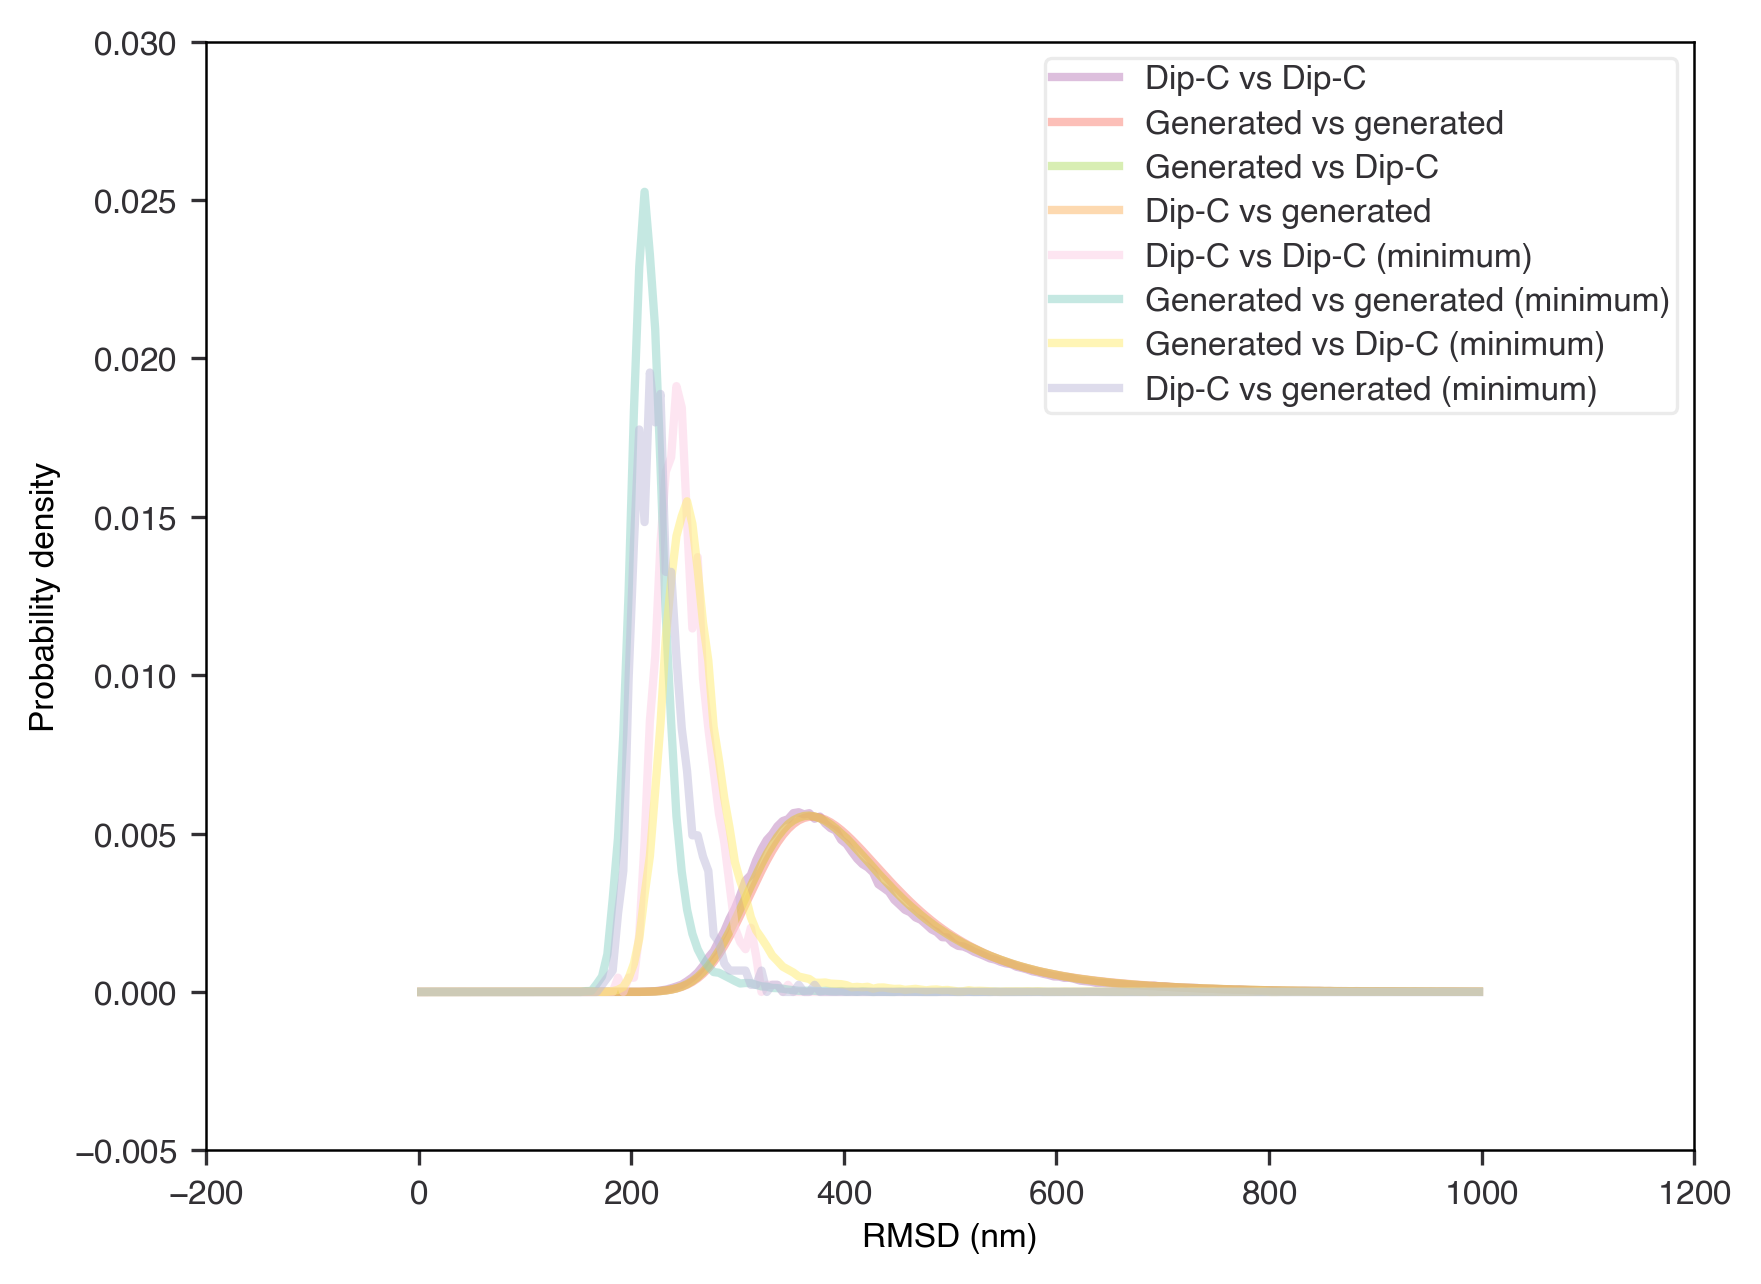

In [10]:
x = (bins[1:] + bins[:-1])/2

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x,tan_on_tan_vals,label='Dip-C vs Dip-C',alpha=.5)
ax.plot(x,gen_on_gen_vals,label='Generated vs generated',alpha=.5)
ax.plot(x,gen_on_tan_vals,label='Generated vs Dip-C',alpha=.5)
ax.plot(x,tan_on_gen_vals,label='Dip-C vs generated',alpha=.5)

ax.plot(x,tan_on_tan_min_vals,label='Dip-C vs Dip-C (minimum)',alpha=.5)
ax.plot(x,gen_on_gen_min_vals,label='Generated vs generated (minimum)',alpha=.5)
ax.plot(x,gen_on_tan_min_vals,label='Generated vs Dip-C (minimum)',alpha=.5)
ax.plot(x,tan_on_gen_min_vals,label='Dip-C vs generated (minimum)',alpha=.5)

ax.set_xlabel('RMSD (nm)')
ax.set_ylabel('Probability density')
ax.legend()

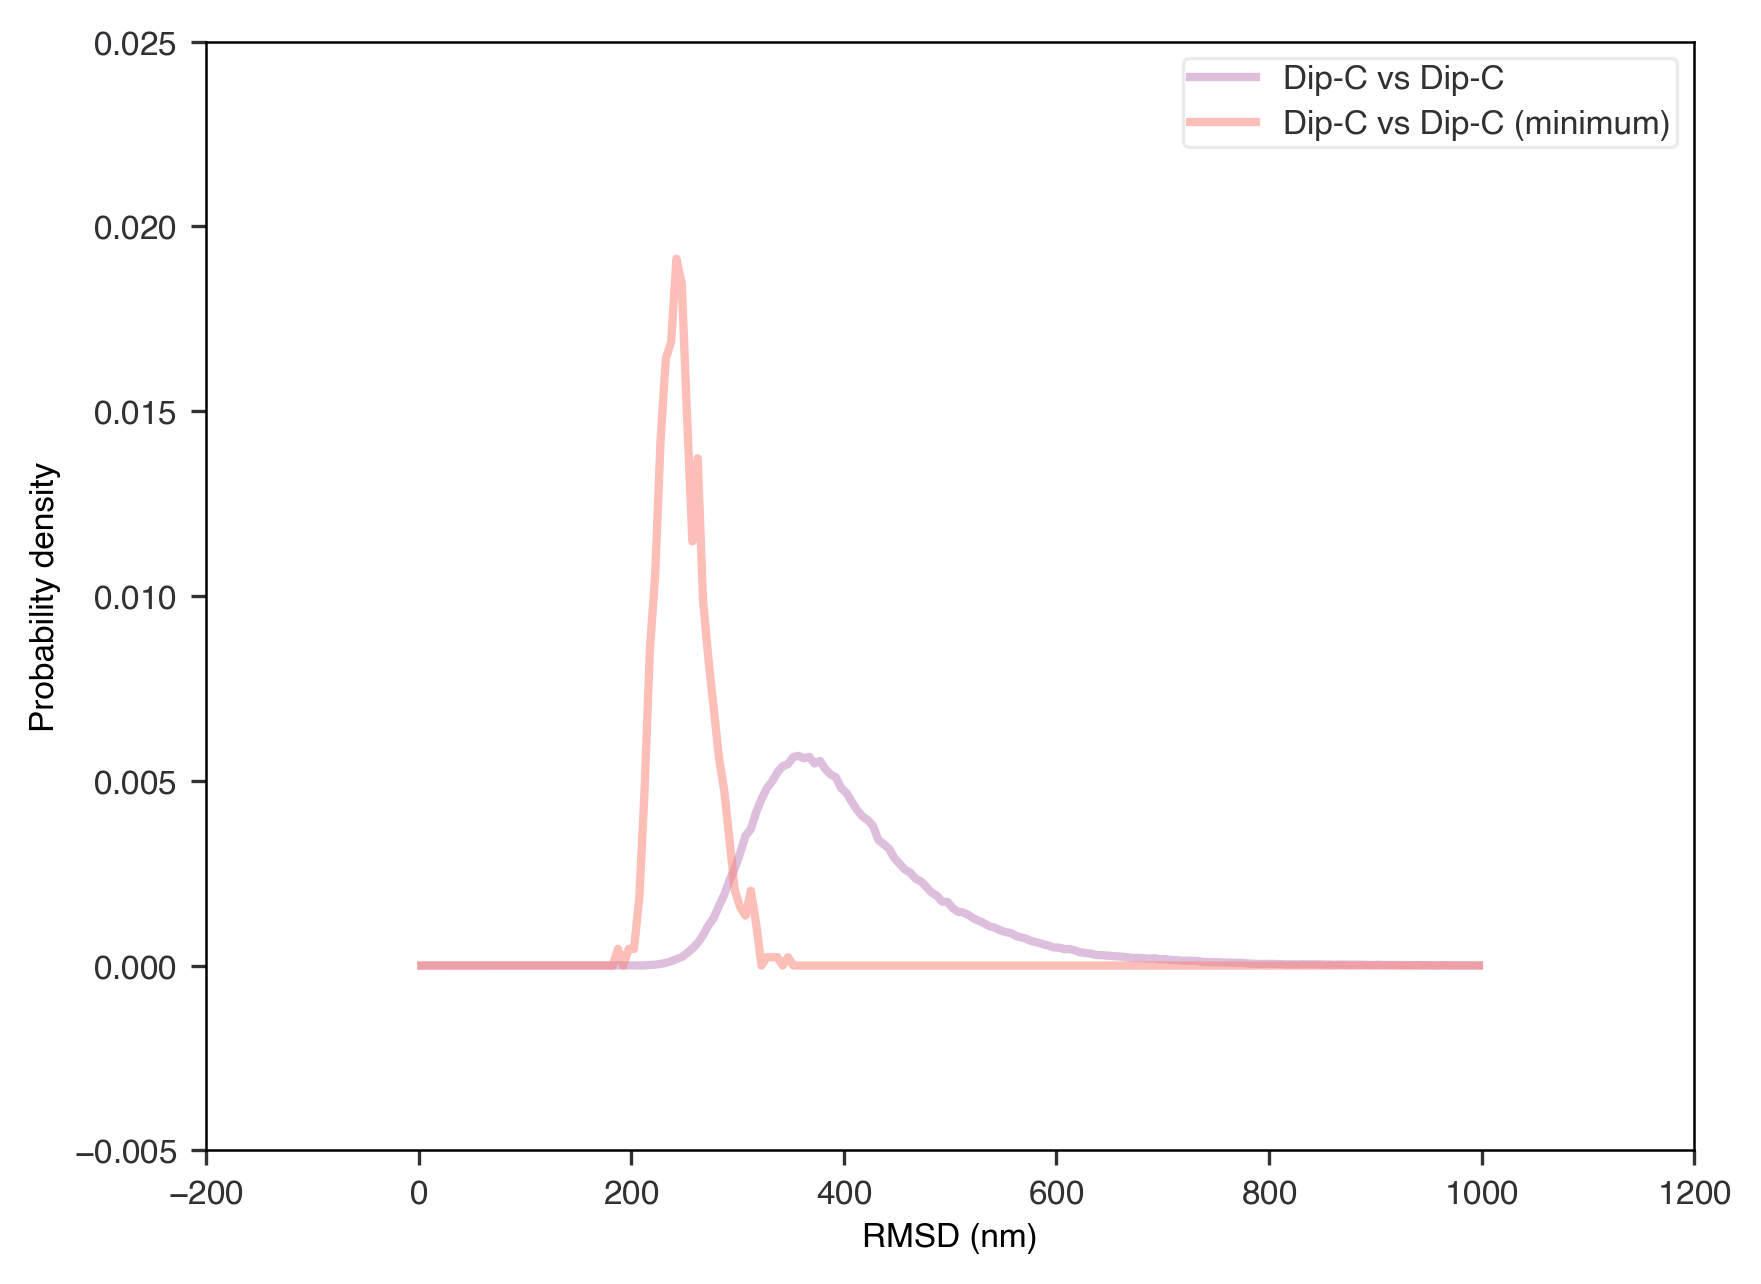

In [11]:
x = (bins[1:] + bins[:-1])/2

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x,tan_on_tan_vals,label='Dip-C vs Dip-C',alpha=.5)
#ax.plot(x,gen_on_gen_vals,label='Generated vs generated',alpha=.5)
#ax.plot(x,gen_on_tan_vals,label='Generated vs Dip-C',alpha=.5)
#ax.plot(x,tan_on_gen_vals,label='Dip-C vs generated',alpha=.5)

ax.plot(x,tan_on_tan_min_vals,label='Dip-C vs Dip-C (minimum)',alpha=.5)
#ax.plot(x,gen_on_gen_min_vals,label='Generated vs generated (minimum)',alpha=.5)
#ax.plot(x,gen_on_tan_min_vals,label='Generated vs Dip-C (minimum)',alpha=.5)
#ax.plot(x,tan_on_gen_min_vals,label='Dip-C vs generated (minimum)',alpha=.5)

ax.set_xlabel('RMSD (nm)')
ax.set_ylabel('Probability density')
ax.legend()

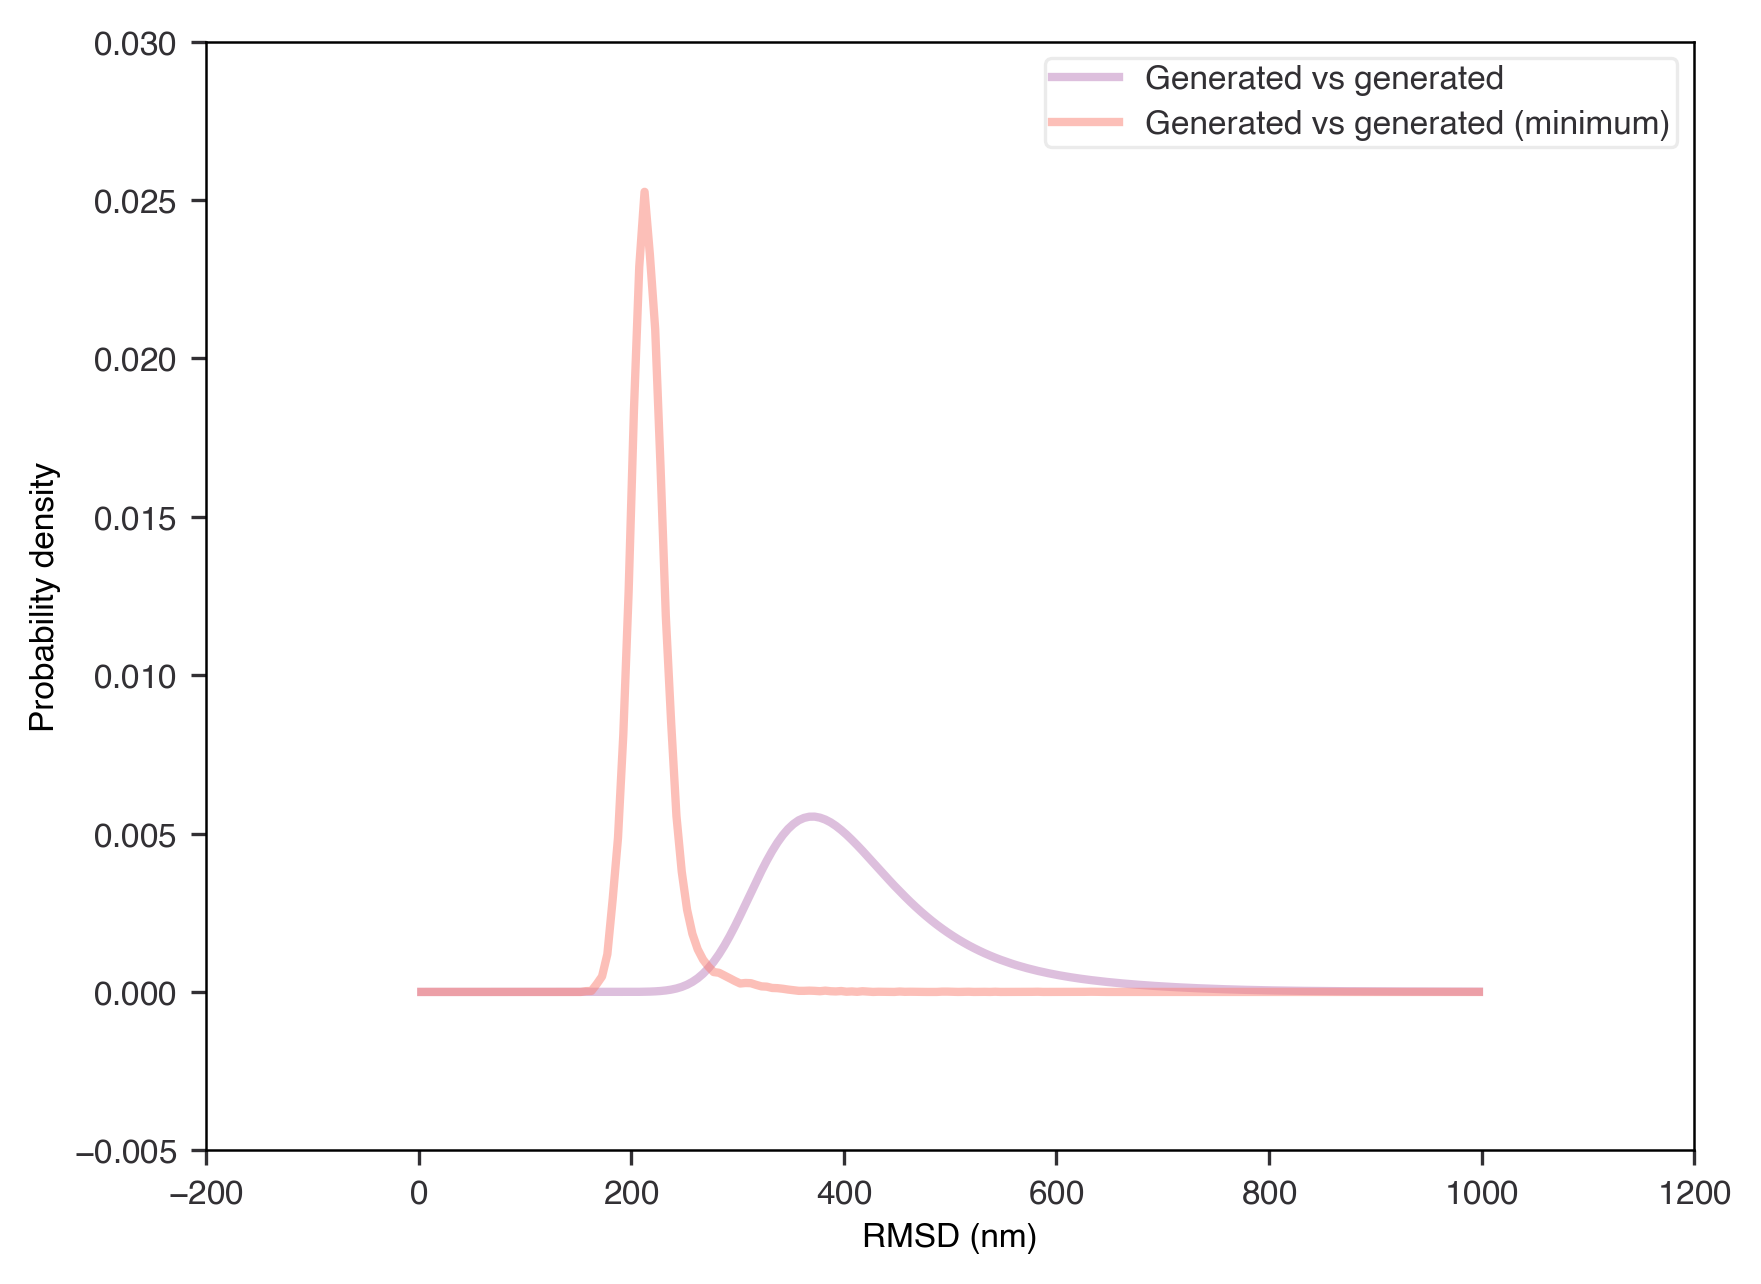

In [12]:
x = (bins[1:] + bins[:-1])/2

fig = plt.figure()
ax = fig.add_subplot(111)

#ax.plot(x,tan_on_tan_vals,label='Dip-C vs Dip-C',alpha=.5)
ax.plot(x,gen_on_gen_vals,label='Generated vs generated',alpha=.5)
#ax.plot(x,gen_on_tan_vals,label='Generated vs Dip-C',alpha=.5)
#ax.plot(x,tan_on_gen_vals,label='Dip-C vs generated',alpha=.5)

#ax.plot(x,tan_on_tan_min_vals,label='Dip-C vs Dip-C (minimum)',alpha=.5)
ax.plot(x,gen_on_gen_min_vals,label='Generated vs generated (minimum)',alpha=.5)
#ax.plot(x,gen_on_tan_min_vals,label='Generated vs Dip-C (minimum)',alpha=.5)
#ax.plot(x,tan_on_gen_min_vals,label='Dip-C vs generated (minimum)',alpha=.5)

ax.set_xlabel('RMSD (nm)')
ax.set_ylabel('Probability density')
ax.legend()

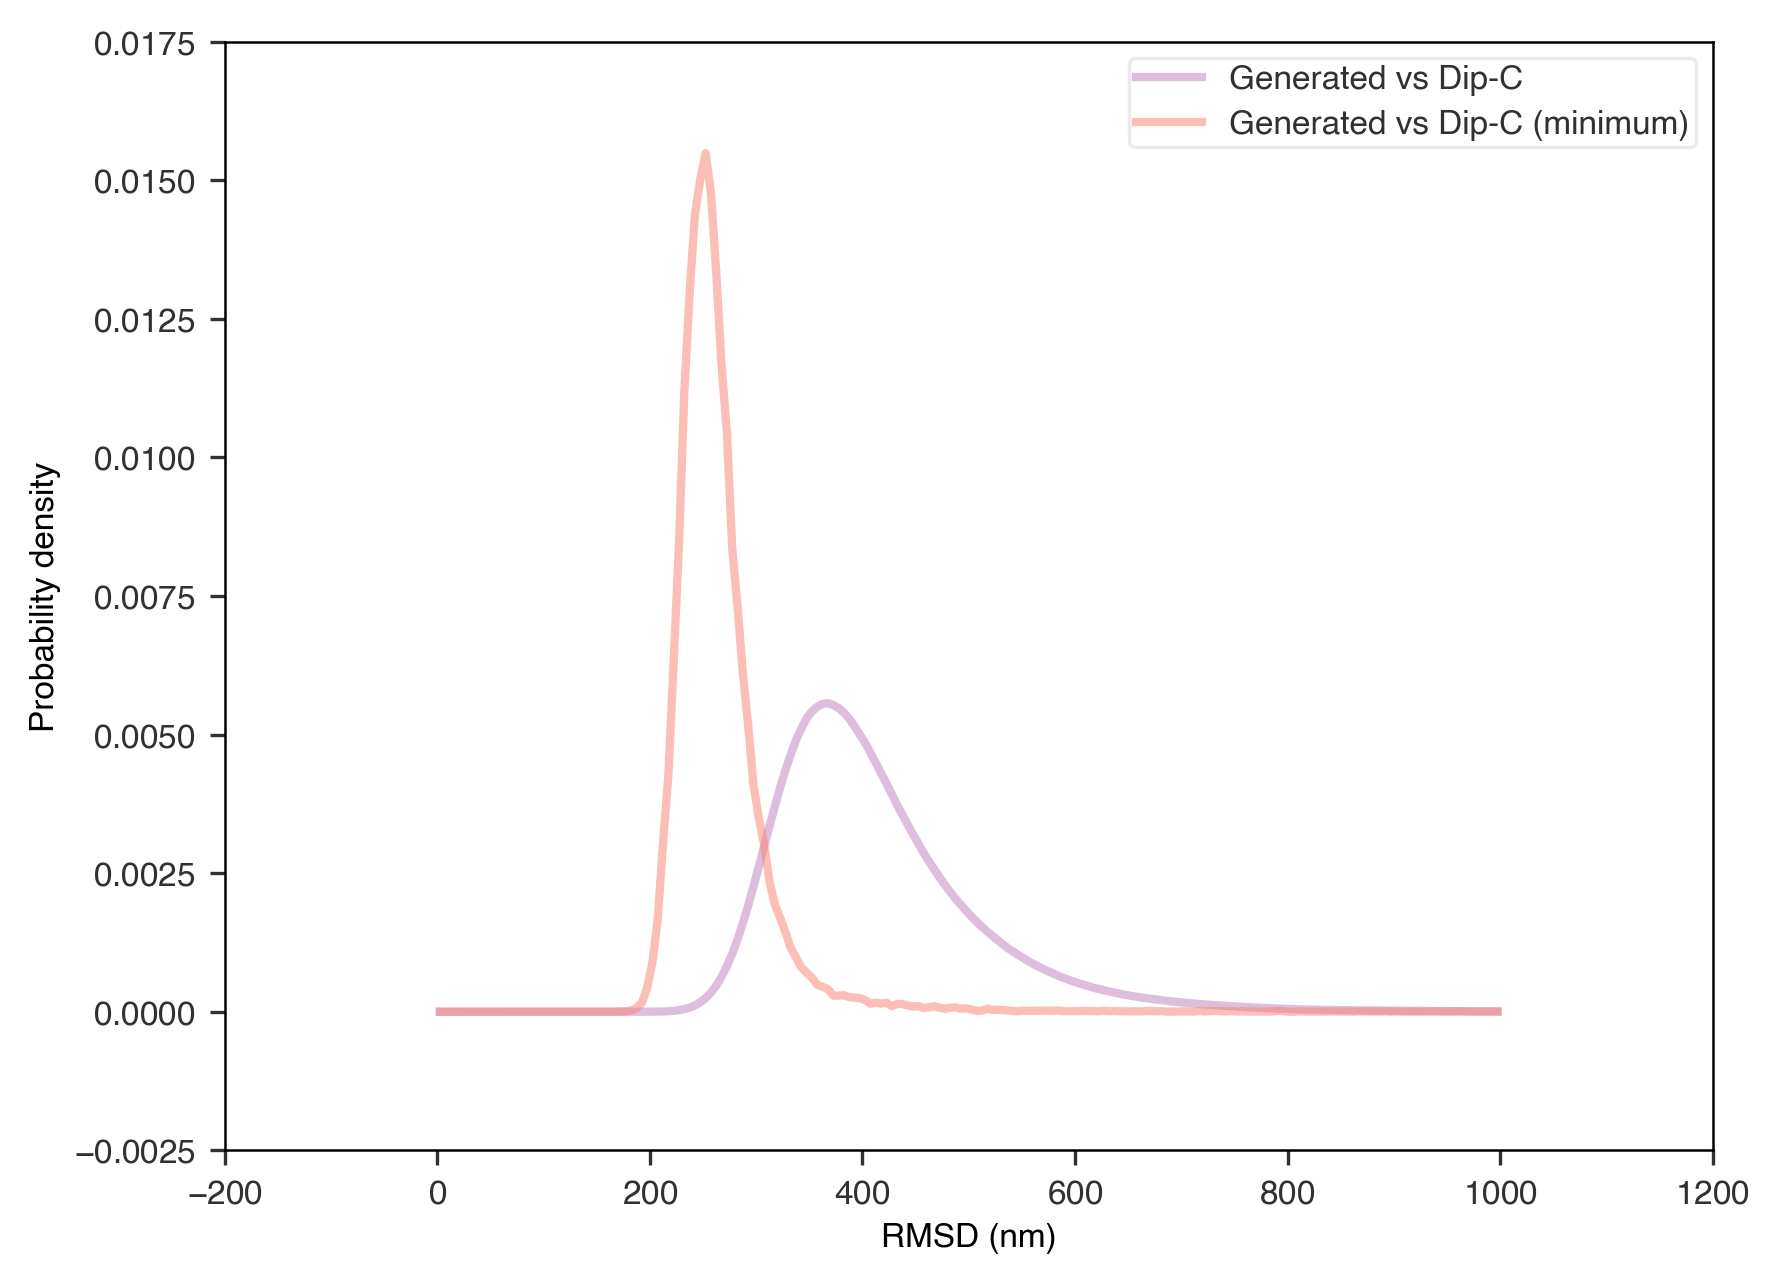

In [13]:
x = (bins[1:] + bins[:-1])/2

fig = plt.figure()
ax = fig.add_subplot(111)

#ax.plot(x,tan_on_tan_vals,label='Dip-C vs Dip-C',alpha=.5)
#ax.plot(x,gen_on_gen_vals,label='Generated vs generated',alpha=.5)
ax.plot(x,gen_on_tan_vals,label='Generated vs Dip-C',alpha=.5)
#ax.plot(x,tan_on_gen_vals,label='Dip-C vs generated',alpha=.5)

#ax.plot(x,tan_on_tan_min_vals,label='Dip-C vs Dip-C (minimum)',alpha=.5)
#ax.plot(x,gen_on_gen_min_vals,label='Generated vs generated (minimum)',alpha=.5)
ax.plot(x,gen_on_tan_min_vals,label='Generated vs Dip-C (minimum)',alpha=.5)
#ax.plot(x,tan_on_gen_min_vals,label='Dip-C vs generated (minimum)',alpha=.5)

ax.set_xlabel('RMSD (nm)')
ax.set_ylabel('Probability density')
ax.legend()

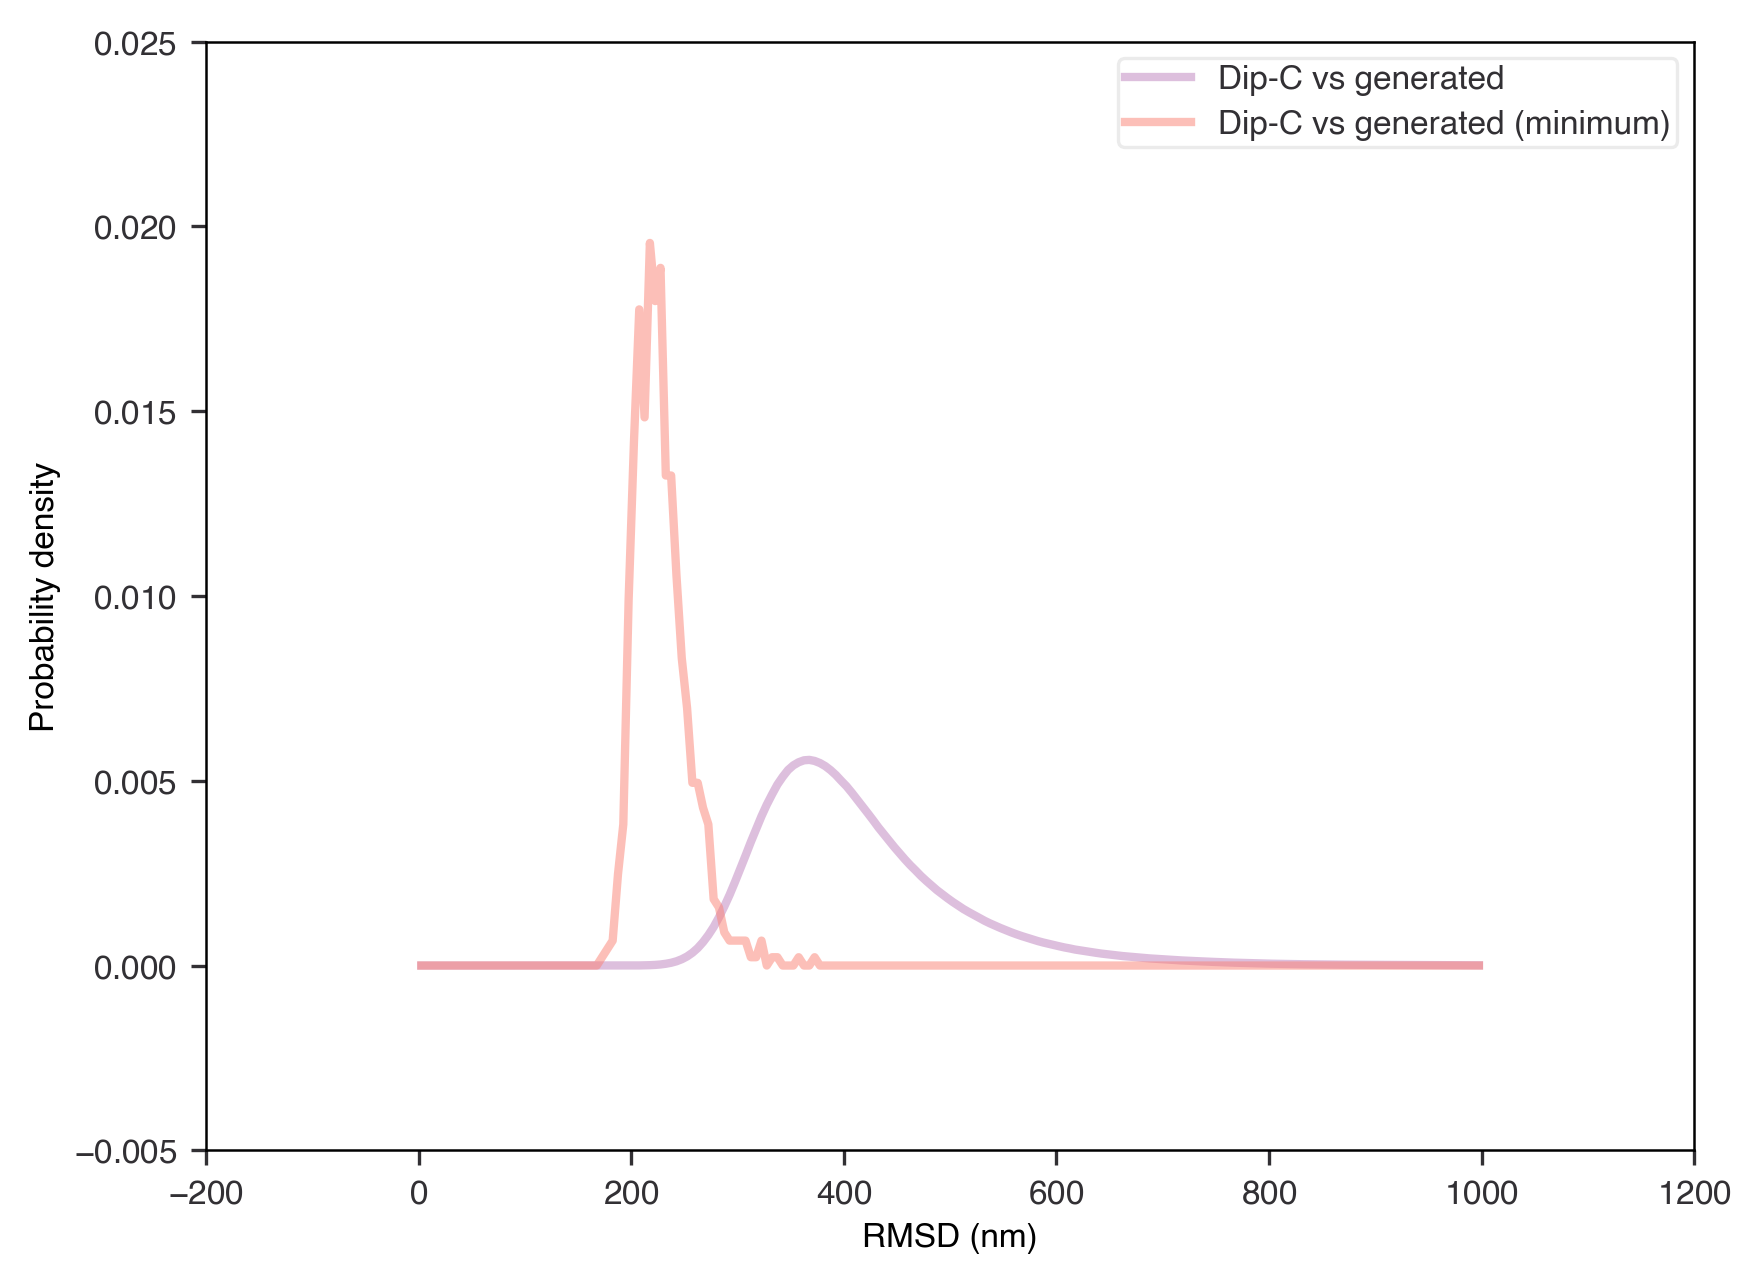

In [14]:
x = (bins[1:] + bins[:-1])/2

fig = plt.figure()
ax = fig.add_subplot(111)

#ax.plot(x,tan_on_tan_vals,label='Dip-C vs Dip-C',alpha=.5)
#ax.plot(x,gen_on_gen_vals,label='Generated vs generated',alpha=.5)
#ax.plot(x,gen_on_tan_vals,label='Generated vs Dip-C',alpha=.5)
ax.plot(x,tan_on_gen_vals,label='Dip-C vs generated',alpha=.5)

#ax.plot(x,tan_on_tan_min_vals,label='Dip-C vs Dip-C (minimum)',alpha=.5)
#ax.plot(x,gen_on_gen_min_vals,label='Generated vs generated (minimum)',alpha=.5)
#ax.plot(x,gen_on_tan_min_vals,label='Generated vs Dip-C (minimum)',alpha=.5)
ax.plot(x,tan_on_gen_min_vals,label='Dip-C vs generated (minimum)',alpha=.5)

ax.set_xlabel('RMSD (nm)')
ax.set_ylabel('Probability density')
ax.legend()

In [10]:
import pandas as pd

rosetta = pd.read_pickle('../data/embeddings_64_after_transformer/rosetta_stone.pkl')

for region_idx,(_,_,genomic_idx) in enumerate(rosetta['1']):
    if genomic_idx in [33_860_000,35_260_000]:
        print(region_idx,genomic_idx)

1567 33860000
1637 35260000


In [23]:
rosetta['1'][1593][-1] + 1_280_000

35660000

In [24]:
(33860000 + 35260000)//2 - 1_280_000//2

33920000

In [25]:
for region_idx,(_,_,genomic_idx) in enumerate(rosetta['1']):
    if genomic_idx == 33920000:
        print(region_idx)

1570


In [26]:
sys.path.insert(1,'../code/data_utils/')
from ConfigDataset import ConfigDataset

In [27]:
config_ds = ConfigDataset(
    '../data/processed_data.hdf5',
    segment_length=64,
    remove_diagonal=False,
    batch_size=0,
    normalize_distances=False,
    geos=None,
    organisms=None,
    cell_types=None,
    cell_numbers=None,
    chroms=['1'],
    replicates=None,
    shuffle=True,
    allow_overlap=True,
    two_channels=False,
    try_GPU=True,
    mean_dist_fp='',
    mean_sq_dist_fp=''
)

In [31]:
tan_configs = Coordinates(
    config_ds.fetch_specific_coords('1',33920000)[1]
)
tan_configs._values*= 100

In [39]:
coords_ug = Coordinates('../data/samples/origami_64_no_embed_reduction/eval_mode/corrected/unguided.pt')
rgs_unguided = {}
rgs = {}
for window_size in range(2,65):
    temp_rgs = []
    i = max( (coords_ug.num_beads - window_size)//2, 0)
    j = i + window_size
    rgs_unguided[window_size] = coord_ug[:,i:j,:].trajectory.compute_rg()
    i = 0 
    j = window_size
    while j <= tan_configs.num_beads:
        temp_rgs.append( tan_configs[:,i:j,:].trajectory.compute_rg() )
        i+=1
        j+=1
    rgs[window_size] = torch.cat(temp_rgs)

Text(0.5, 1.0, 'Radius of gyration in Chromosome 1: 33,920-35,200 kb\nTan dataset')

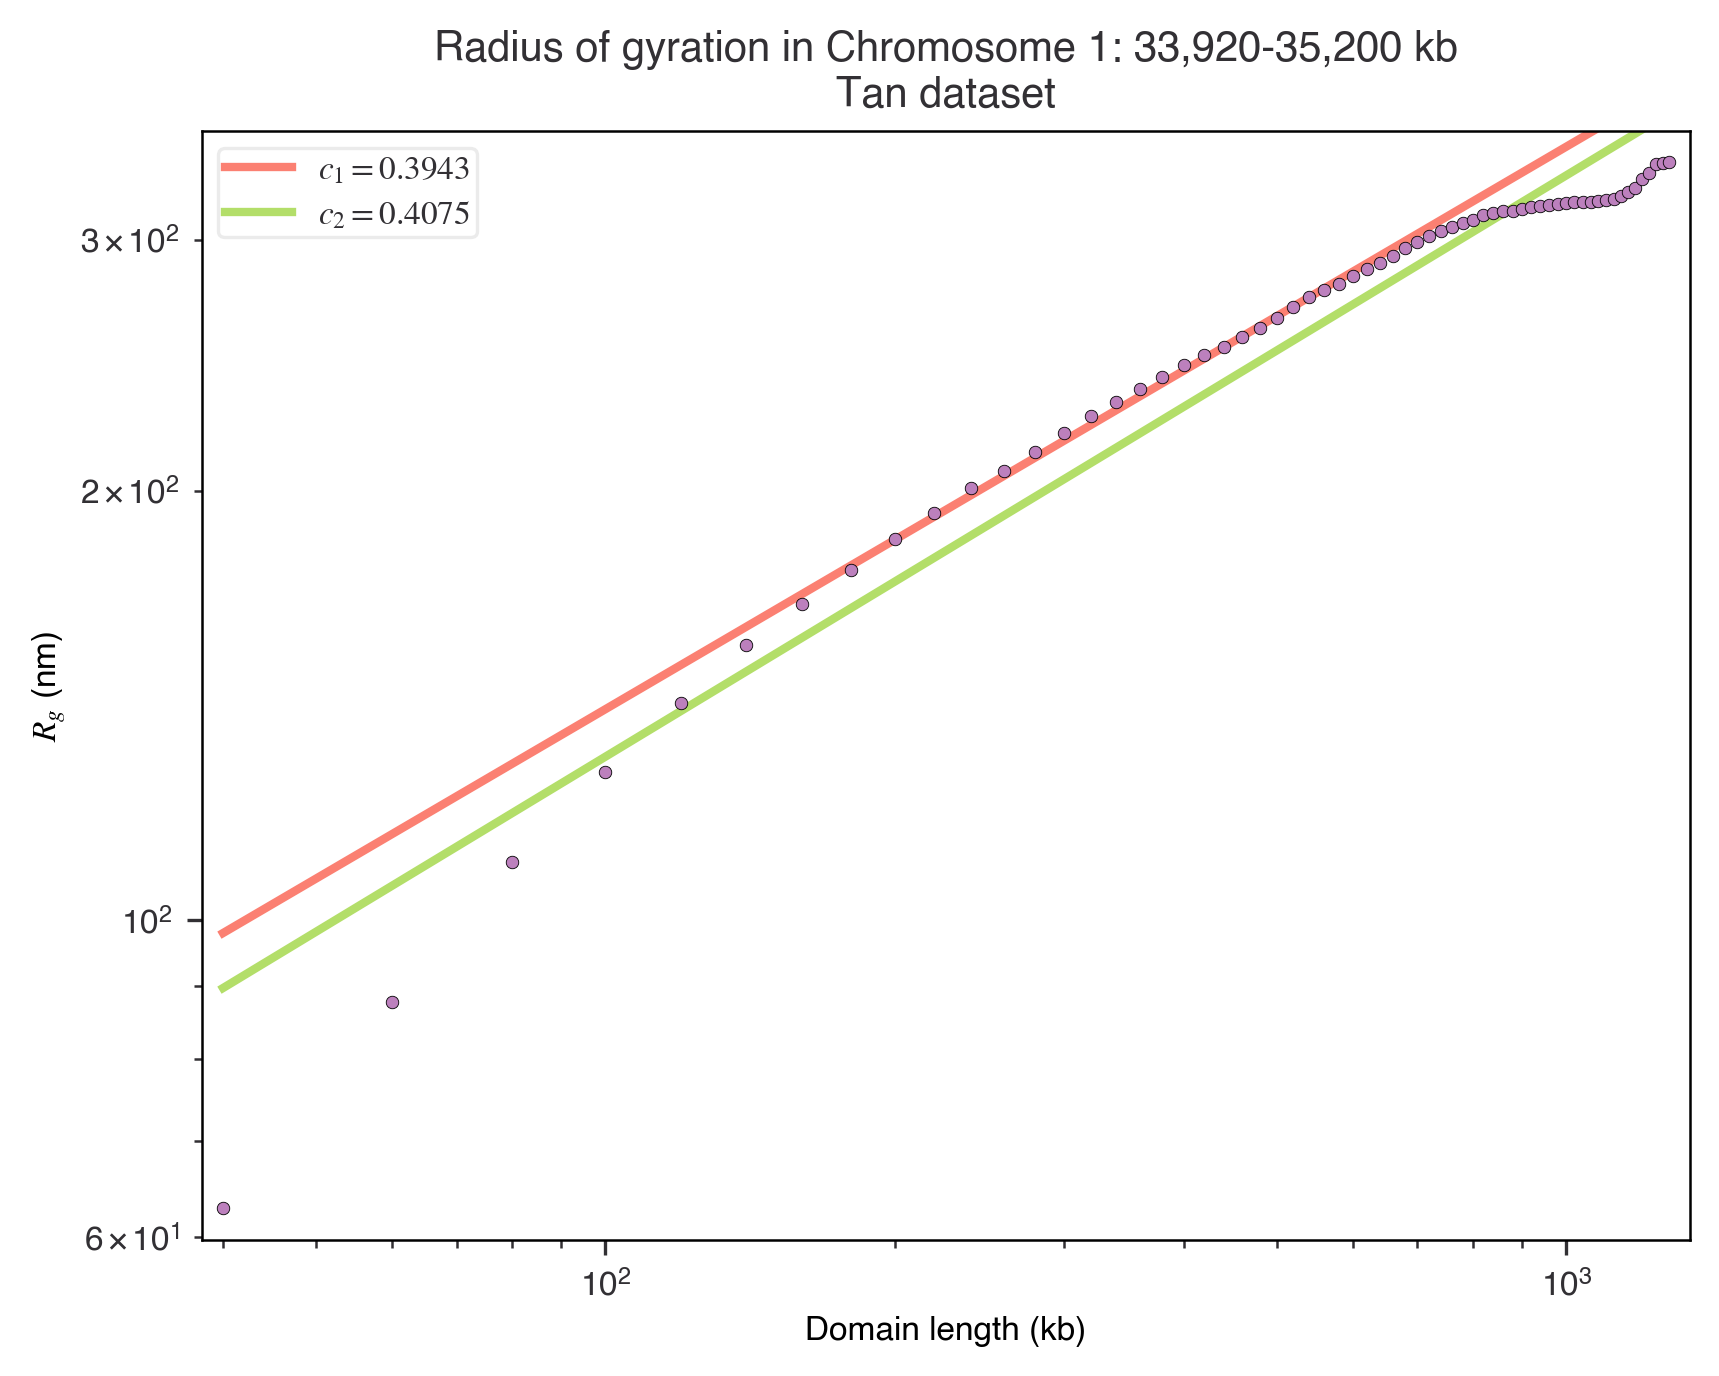

In [70]:
import numpy as np

x = []
y = []
yerr = []

for ws in rgs:
    x.append(20 * ws)
    y.append(rgs[ws].median())
    #y.append(rgs[ws].mean())
    yerr.append( ( rgs[ws].std() / rgs[ws].numel() ).sqrt() )

xx = torch.tensor(x[5:32]).log().numpy()
yy = torch.tensor(y[5:32]).log().numpy()
m,b = np.polyfit(xx,yy,1)
xx = [ x[0], x[-1] ]
yy = [ np.exp(np.log(xxx) * m + b) for xxx in xx]

xx2 = torch.tensor(x).log().numpy()
yy2 = torch.tensor(y).log().numpy()
m2,b2 = np.polyfit(xx2,yy2,1)
yy2 = [ np.exp(np.log(xxx) * m2 + b2) for xxx in xx]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(x,y,yerr=yerr,fmt='.')
ax.plot(xx,yy,label=f'$c_1={round(m,4)}$')
ax.plot(xx,yy2,label=f'$c_2={round(m2,4)}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([40 * .95,1280 * 1.05])
ax.set_ylim([ y[0] * .95, y[-1] * 1.05 ])

ax.legend()
ax.set_xlabel('Domain length (kb)')
ax.set_ylabel('$R_g$ (nm)')
ax.set_title(
    f'Radius of gyration in Chromosome 1: {33920:,}-{33920+1_280:,} kb' +
    '\nTan dataset'
)


Text(0.5, 1.0, 'Radius of gyration in Chromosome 1: 33,920-35,200 kb\nTan dataset')

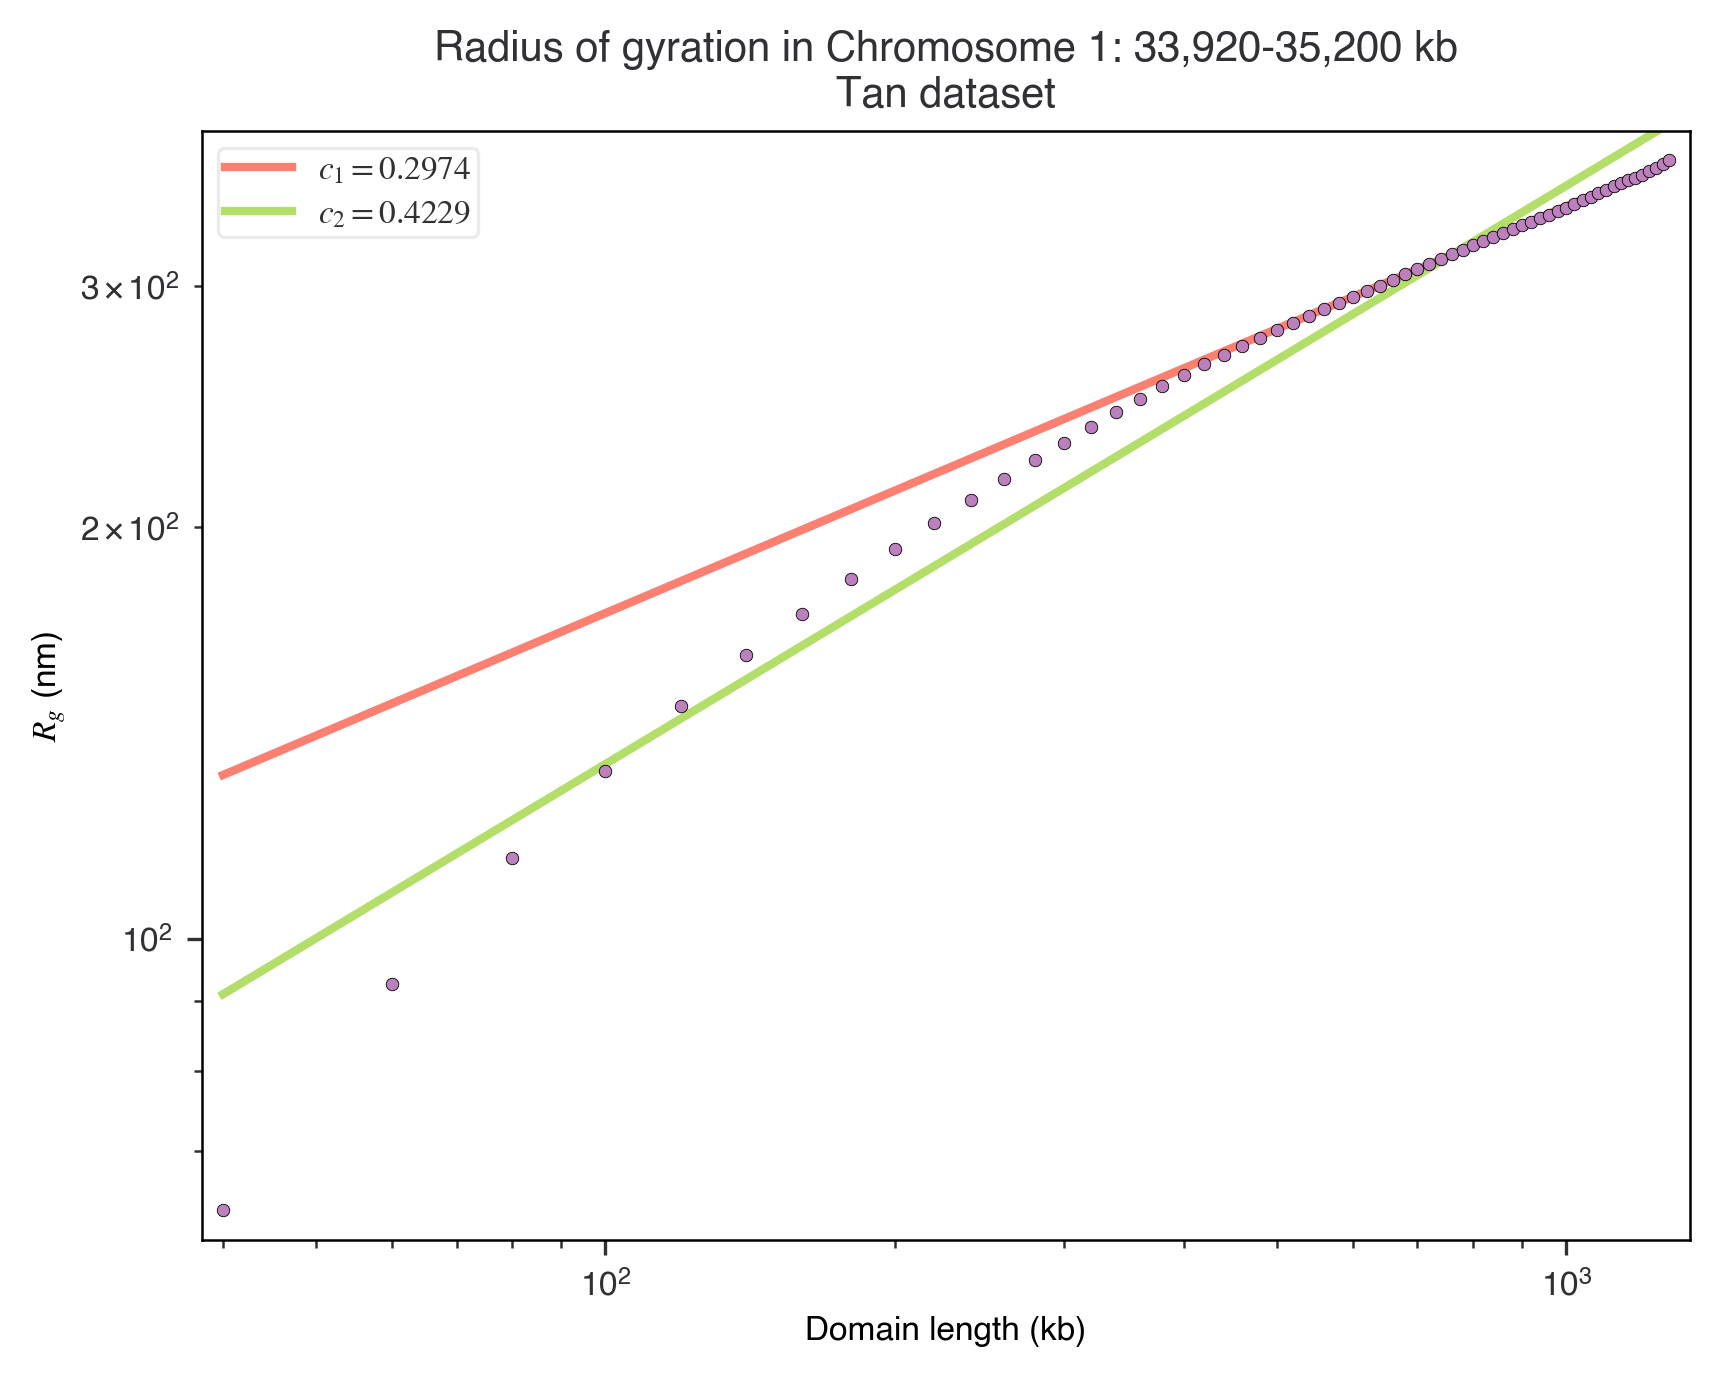

In [71]:
import numpy as np

x = []
y = []
yerr = []

for ws in rgs:
    x.append(20 * ws)
    #y.append(rgs[ws].median())
    y.append(rgs[ws].mean())
    yerr.append( ( rgs[ws].std() / rgs[ws].numel() ).sqrt() )

xx = torch.tensor(x[30:]).log().numpy()
yy = torch.tensor(y[30:]).log().numpy()
m,b = np.polyfit(xx,yy,1)
xx = [ x[0], x[-1] ]
yy = [ np.exp(np.log(xxx) * m + b) for xxx in xx]

xx2 = torch.tensor(x).log().numpy()
yy2 = torch.tensor(y).log().numpy()
m2,b2 = np.polyfit(xx2,yy2,1)
yy2 = [ np.exp(np.log(xxx) * m2 + b2) for xxx in xx]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(x,y,yerr=yerr,fmt='.')
ax.plot(xx,yy,label=f'$c_1={round(m,4)}$')
ax.plot(xx,yy2,label=f'$c_2={round(m2,4)}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([40 * .95,1280 * 1.05])
ax.set_ylim([ y[0] * .95, y[-1] * 1.05 ])

ax.legend()
ax.set_xlabel('Domain length (kb)')
ax.set_ylabel('$R_g$ (nm)')
ax.set_title(
    f'Radius of gyration in Chromosome 1: {33920:,}-{33920+1_280:,} kb' +
    '\nTan dataset'
)


Text(0, 0.5, 'Probability density')

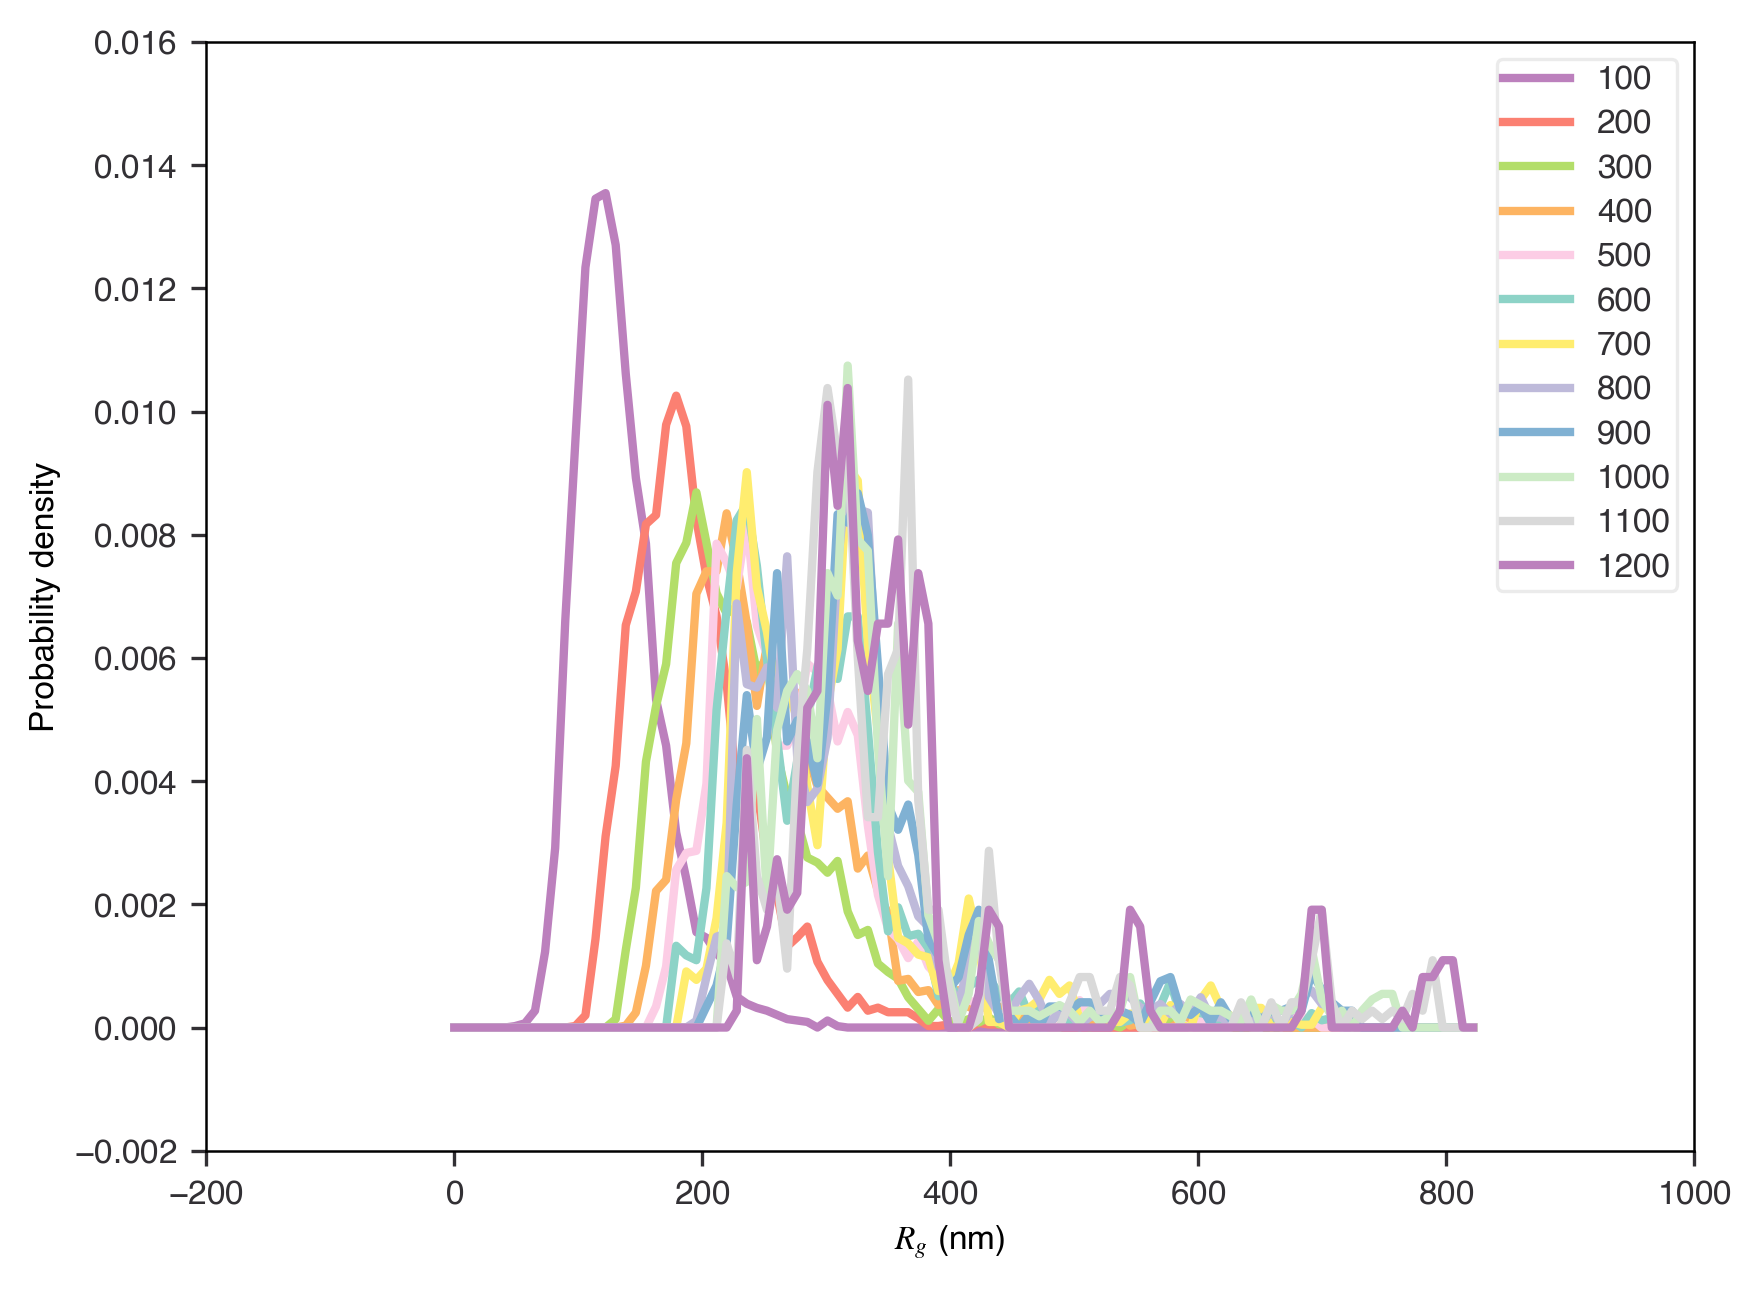

In [66]:
minn = min([ rgs[ws].min() for ws in rgs ])
maxx = max([ rgs[ws].max() for ws in rgs ])
delta = (maxx - minn) / 100
bins = torch.arange(minn-delta,maxx+2*delta,delta,dtype=list(rgs.items())[0][1].dtype)

fig = plt.figure()
ax = fig.add_subplot(111)

x = (bins[1:] + bins[:-1])/2
for ws in range(5,65,5):#rgs:
    length = 20 * ws
    y = torch.histogram(rgs[ws],bins,density=True).hist
    ax.plot(x,y,label=str(length))

ax.legend()
ax.set_xlabel('$R_g$ (nm)')
ax.set_ylabel('Probability density')
    

In [80]:
a = tan_configs[1:].clone().trajectory.superpose(tan_configs[0]).rmsd(tan_configs[0])
b = tan_configs.clone()
b._values/= 100 
b = b[1:].clone().trajectory.superpose(b[0]).rmsd(b[0])

In [12]:
(1,2) in [(2,2)]

False

In [16]:
sys.path.insert(1,'../code/data_utils/')
from ConfigDataset import ConfigDataset

# Load the Tan configurations
config_ds = ConfigDataset(
    '../data/processed_data.hdf5',
    segment_length=64,
    remove_diagonal=False,
    batch_size=0,
    normalize_distances=False,
    geos=None,
    organisms=None,
    cell_types=None,
    cell_numbers=None,
    chroms=['22'],
    replicates=None,
    shuffle=True,
    allow_overlap=True,
    two_channels=False,
    try_GPU=True,
    mean_dist_fp=None,
    mean_sq_dist_fp=None
)

In [18]:
info,coords = config_ds.fetch_specific_coords('22',16980000)

In [25]:
info

,Cell,Replicate,Lineage
0,4,1,mat
1,4,1,pat
2,4,2,mat
3,4,2,pat
